Find the dataset examples that maximize the activation of the picked neuron. First with a dense NN, then with a CNN; on MNIST.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

# Simple DNN to Classify MNIST

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


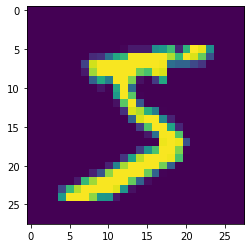

In [4]:
plt.figure()
plt.imshow(train_images[0])

preprocessing

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

model

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2655 - accuracy: 0.9231
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1194 - accuracy: 0.9650
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0858 - accuracy: 0.9729
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0677 - accuracy: 0.9786
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0570 - accuracy: 0.9814
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0461 - accuracy: 0.9851
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0403 - accuracy: 0.9871
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0351 - accuracy: 0.9884
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0298 - accuracy: 0.9903
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.027

In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
test_acc

313/313 - 0s - loss: 0.0993 - accuracy: 0.9738 - 485ms/epoch - 2ms/step


0.973800003528595

# Examples that maximize certain activations

In [12]:
predictions = model.predict(test_images)

In [15]:
a = [] # activations for layer dense_2, neuron 7
for ind_pred in predictions:
  a.append(ind_pred[7])
a = np.asarray(a)

In [16]:
a.max(), a.min()

(27.260735, -30.926825)

In [17]:
a = np.asarray(a)
a_positive = a[a > 0]

In [18]:
pd.DataFrame(a_positive).describe()

,0
count,2504.000000
mean,6.740529
std,6.682358
min,0.000180
25%,1.127353
50%,3.118548
75%,12.884483
max,27.260735


Examples that produce activation above 75%: 

In [21]:
df = pd.DataFrame(a)
index = df[df > 12.884483].dropna().index.to_list()

In [22]:
len(index)

626

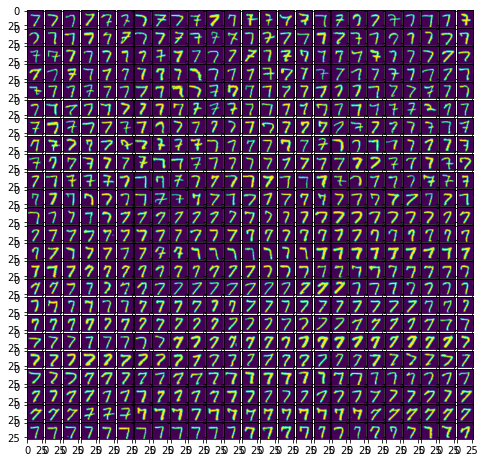

In [33]:
fig = plt.figure(figsize=(8., 8.))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(24, 25))
for ax, i in zip(grid, index):
      im = test_images[i]
      ax.imshow(im)
plt.show()

We knew that high activation examples for the 7th neuron in classification layer must correspond to such examples. Let's pick another neuron, this time from one of the hidden layers, and see what examples high activations of it correspond to.

In [35]:
model_dense_1 = tf.keras.Model(model.input, model.get_layer('dense_1').output)

In [38]:
output_dense_1 = model_dense_1.predict(test_images) 

In [39]:
output_dense_1.shape

(10000, 64)

Picking layer dense_1 (second-to-last), neuron 32

In [41]:
a_dense_1_32 = [] # activations for the neuron 
for ind_output in output_dense_1:
  a_dense_1_32.append(ind_output[32])
a_dense_1_32 = np.asarray(a_dense_1_32)

In [42]:
pd.DataFrame(a_dense_1_32).describe()

,0
count,10000.000000
mean,2.069319
std,1.797551
min,0.000000
25%,0.448381
50%,1.822244
75%,3.255285
max,10.170566


In [53]:
df1 = pd.DataFrame(a_dense_1_32)
index1 = df1[df1 > 8].dropna().index.to_list()

In [52]:
len(index1)

13

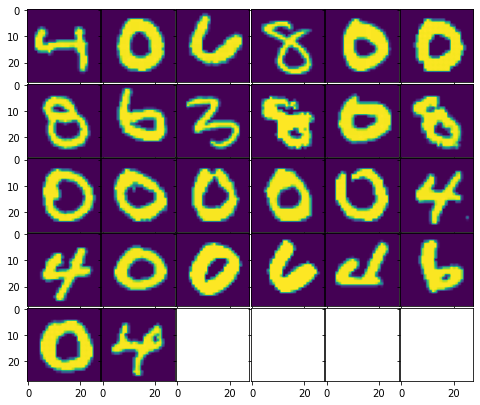

In [54]:
fig = plt.figure(figsize=(8., 8.))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(5, 6))
for ax, i in zip(grid, index1):
      im = test_images[i]
      ax.imshow(im)
plt.show()

Whatever feature that neuron learned, it looks like it helped the network in recognizing 0s. 

*Why visualize by optimization?
Optimization can give us an example input that causes the desired behavior — but why bother with that? Couldn’t we just look through the dataset for examples that cause the desired behavior?

It turns out that optimization approach can be a powerful way to understand what a model is really looking for, because it separates the things causing behavior from things that merely correlate with the causes.*
(https://distill.pub/2017/feature-visualization/)